In [1]:
#import Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm


import warnings
warnings.filterwarnings('ignore')

#### **Data Collection**

Load the dataset into python with pandas

In [2]:
# Import dataset 
df = pd.read_excel('Dataset.xlsx')

#### **Data Exploration**

In data exploration, we will be looking at:

understanding the data structure, statistics, and quality of the dataset visualizing the data to gain insights check for missing values

In [3]:
#See the first 5 rows of the dataset 
df.head(5)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


#### **Check for missing values**

In [4]:
#Checking for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

#### **Check for Duplicates**

In [5]:
df.duplicated().any()

False

#### **Statistical overview of the numerical columns**

In [6]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


Next, we see how the target variable ChurnLabel, and some of the other variables are distributed

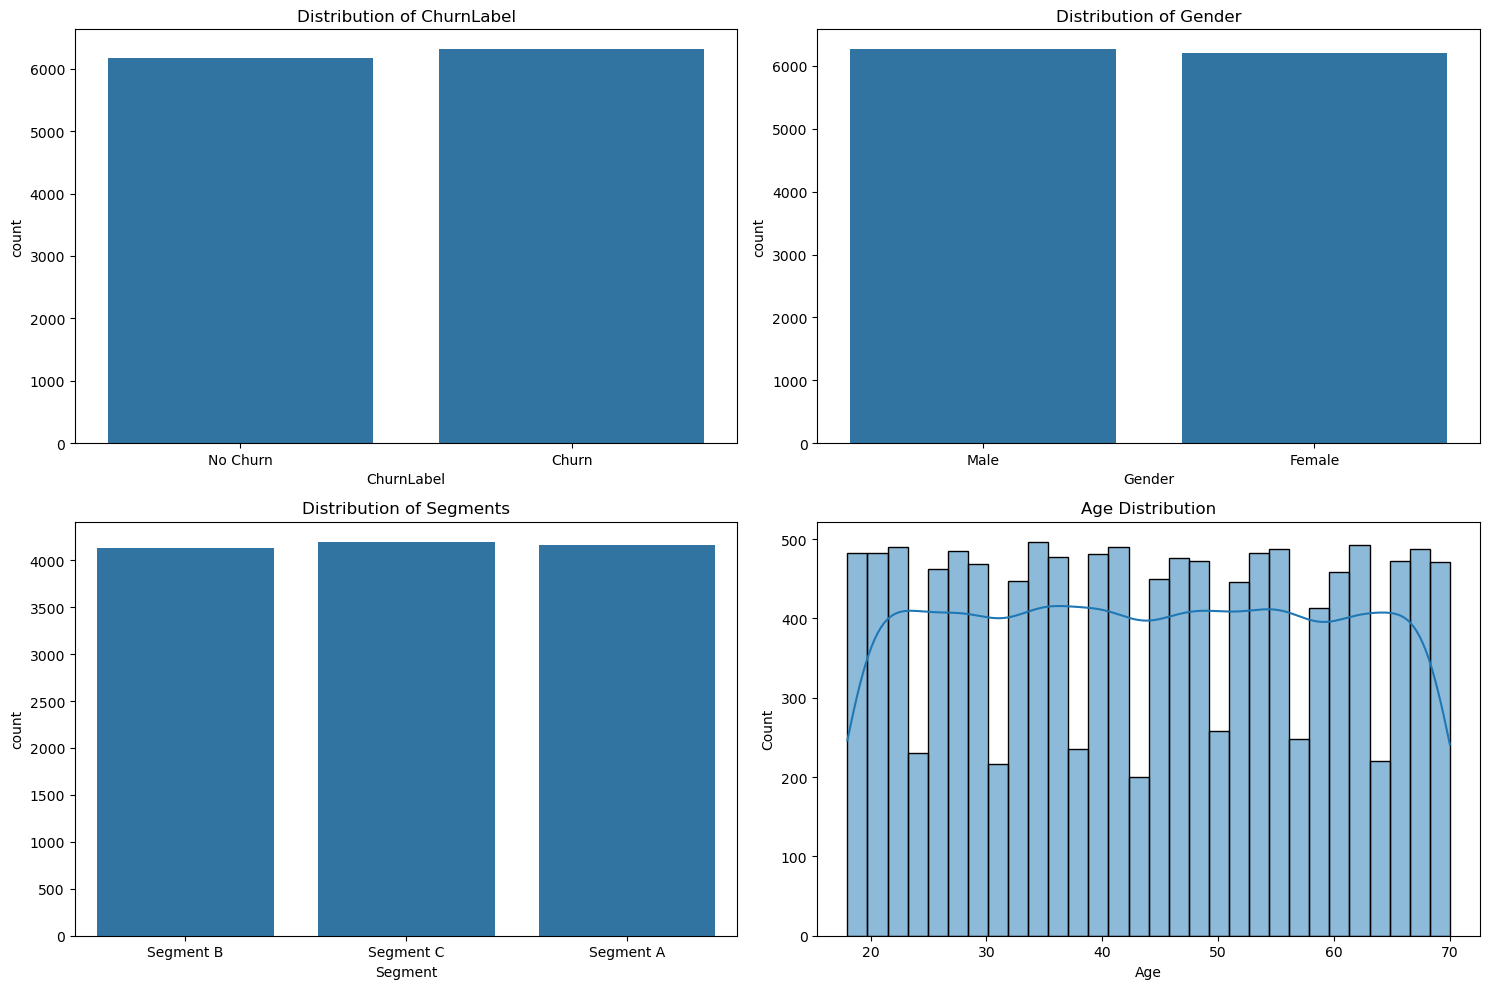

In [7]:
# Setup the figure and axes
fix, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Plot the distribution of the target variable ChurnLabel
sns.countplot(x='ChurnLabel', data=df, ax=ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn', 'Churn'])

# Plot distribution of the gender
sns.countplot(x='Gender', data=df, ax=ax[0,1])
ax[0,1].set_title('Distribution of Gender')

# Plot the distribution of the segments
sns.countplot(x='Segment', data=df, ax=ax[1,0])
ax[1,0].set_title('Distribution of Segments')

# Plot the age distrbution
sns.histplot(df['Age'], bins=30, ax=ax[1,1], kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

The distributions above show a balanced dataset.

#### **Correlation Analysis:**

which columns in the dataset correlate with the ChurnLabel column

In [8]:
# Calculate correlation with churn label
df.select_dtypes(include=np.number).corr()

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


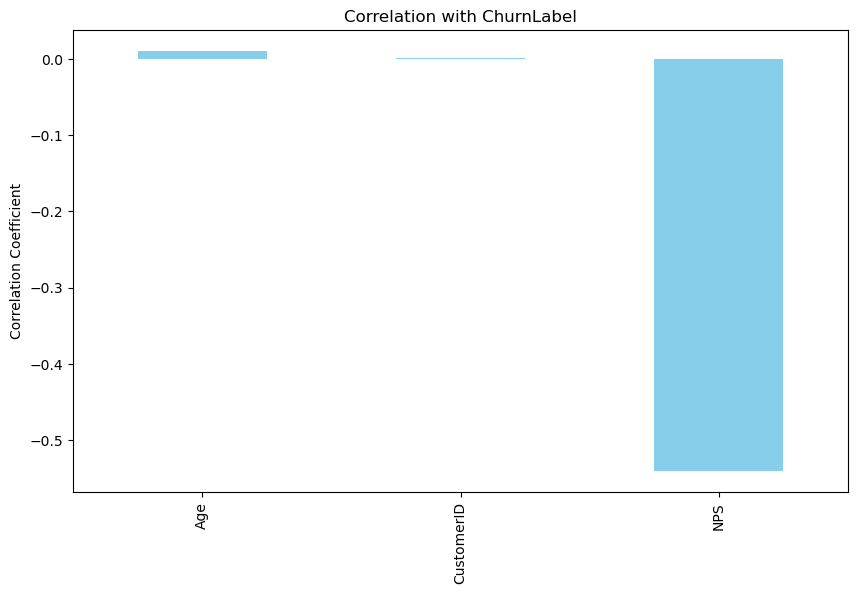

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [9]:
# Calculate correlation with churn label
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# Plot the correlation 
plt.figure(figsize=(10,6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

We are going to be exploring the nested columns next, and see how they are nested

In [10]:
# List out all the nested columns
nested_columns= [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
] 

# Print out the first value in each of the columns 
w1,w2 = 20, 1000
for col in nested_columns: 
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory      | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

#### **Temporal Analysis:**

We take a look at how the churn rate changes overtime, to see if there are any recurring patterns

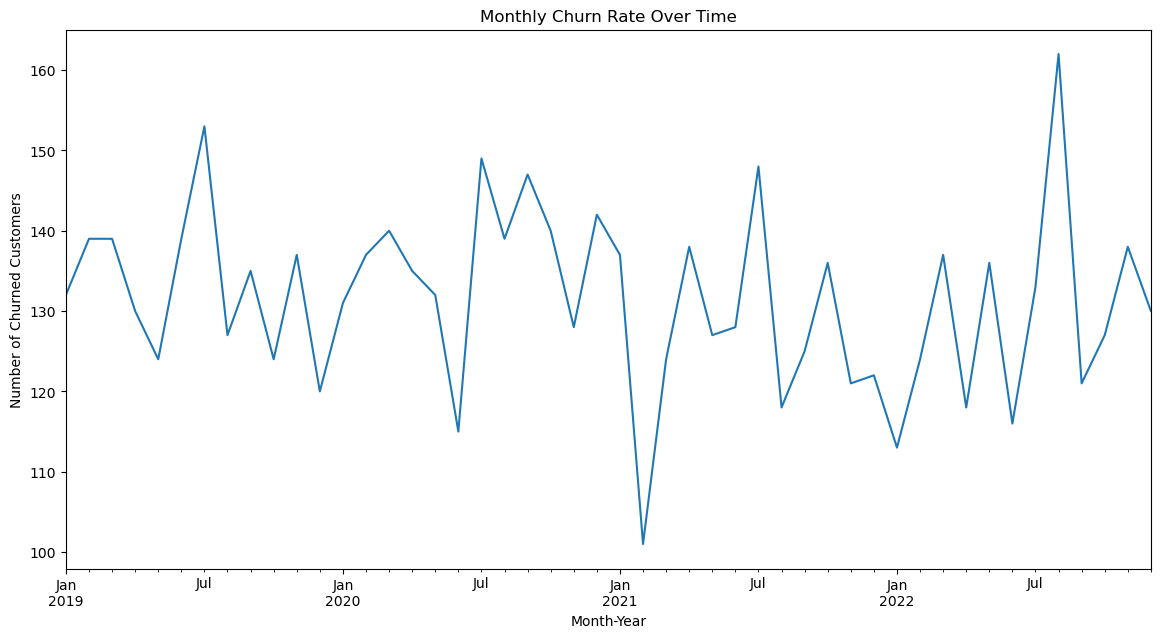

In [11]:
# Convert time stamp to datetime format so it can be grouped
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month-year from the timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Groyup by monthyear and calculate the churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the churn rate over time
plt.figure(figsize=(14,7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

We also need to see if there are any patterns between the customer feedback 'Rating' and the 'ChurnLabel'.

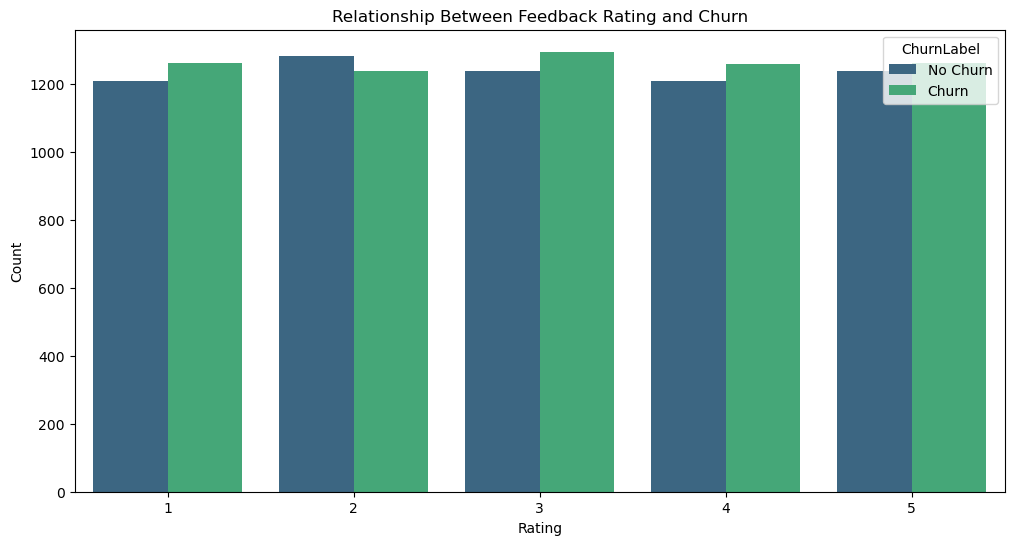

In [12]:
# Extract rating from the feedback column and create a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# Plot the relationship between feedback ratings and churn
plt.figure(figsize=(12,6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship Between Feedback Rating and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the visuals, there does not seem to be any indication that the feedback rating affects the churn label.

In [13]:
# Filter churned customers (assuming ChurnLabel == 1 means churned)
churned_customers = df[df['ChurnLabel'] == 1]

# Group by location and count churns
top_churn_locations = churned_customers['Location'].value_counts().head(20)

# Display as a DataFrame (optional, for nicer format)
top_churn_locations_df = top_churn_locations.reset_index()
top_churn_locations_df.columns = ['Location', 'Churned_Customers']

print(top_churn_locations_df)

             Location  Churned_Customers
0        Lake Michael                 12
1         West Robert                  9
2         East Robert                  8
3    East Christopher                  7
4       North Michael                  7
5       South Michael                  7
6         West Steven                  6
7          Smithmouth                  6
8          New Robert                  6
9         New Michael                  6
10        Port Robert                  6
11  South Christopher                  5
12        East Joseph                  5
13         West James                  5
14         Port Sarah                  5
15        Michaelstad                  5
16         Ashleyfurt                  5
17        West Daniel                  5
18         Lake David                  5
19       New Jennifer                  5


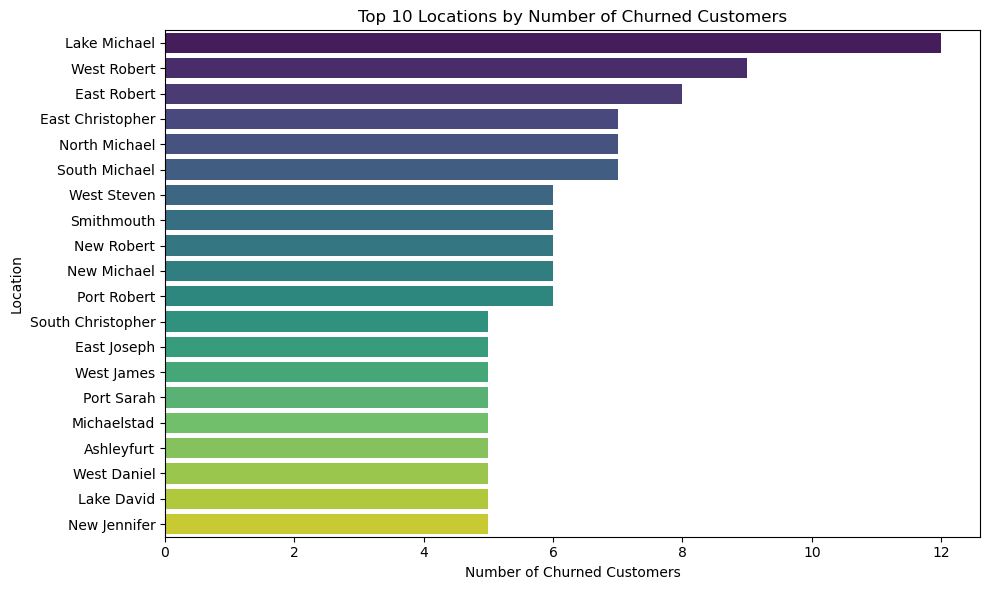

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_churn_locations_df, x='Churned_Customers', y='Location', palette='viridis')
plt.title('Top 10 Locations by Number of Churned Customers')
plt.xlabel('Number of Churned Customers')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

In [15]:
df['Location'].nunique()

9255

- Lake Michael, West Robert, and East Robert have the highest number of churned customers, slightly above others.

- However, the overall difference in churn counts among the top 20 locations is relatively small (mostly between 5 and 12 churned customers per location).

- Many other locations have very similar churn levels, suggesting that churn is not heavily concentrated in just a few geographic areas.

**🔎 Conclusion:**
While some locations like Lake Michael appear to have more churn, the variation is not large enough to definitively state that location is a key driver of churn.